In [ ]:
try:
    !jupyter nbconvert --to script open3d_test.ipynb
    %load_ext autoreload
    %autoreload 2   
except:
    pass

In [1]:
import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt

# Basic Point Cloud Operations

Make sure to pull the Open3D github repository in order to get access to all the examples below. 

https://github.com/isl-org/Open3D


In [14]:
open3dpath="../../../Open3D/examples/test_data/"

In [5]:
print("Load a ply point cloud, print it, and render it")
pcd = o3d.io.read_point_cloud(open3dpath + "fragment.ply")
print(pcd)
print(np.asarray(pcd.points))
o3d.visualization.draw_geometries([pcd],
                                  zoom=0.3412,
                                  front=[0.4257, -0.2125, -0.8795],
                                  lookat=[2.6172, 2.0475, 1.532],
                                  up=[-0.0694, -0.9768, 0.2024])

Load a ply point cloud, print it, and render it
PointCloud with 196133 points.
[[0.65234375 0.84686458 2.37890625]
 [0.65234375 0.83984375 2.38430572]
 [0.66737998 0.83984375 2.37890625]
 ...
 [2.00839925 2.39453125 1.88671875]
 [2.00390625 2.39488506 1.88671875]
 [2.00390625 2.39453125 1.88793314]]


In [8]:
print("Downsample the point cloud with a voxel of 0.05")
downpcd = pcd.voxel_down_sample(voxel_size=0.05)
o3d.visualization.draw_geometries([downpcd],
                                  zoom=0.3412,
                                  front=[0.4257, -0.2125, -0.8795],
                                  lookat=[2.6172, 2.0475, 1.532],
                                  up=[-0.0694, -0.9768, 0.2024])

Downsample the point cloud with a voxel of 0.05


In [9]:
print("Recompute the normal of the downsampled point cloud")
downpcd.estimate_normals(
    search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=0.1, max_nn=30))
o3d.visualization.draw_geometries([downpcd],
                                  zoom=0.3412,
                                  front=[0.4257, -0.2125, -0.8795],
                                  lookat=[2.6172, 2.0475, 1.532],
                                  up=[-0.0694, -0.9768, 0.2024],
                                  point_show_normal=True)

Recompute the normal of the downsampled point cloud


In [16]:
print("Load a polygon volume and use it to crop the original point cloud")
vol = o3d.visualization.read_selection_polygon_volume(
    open3dpath+"Crop/cropped.json")
chair = vol.crop_point_cloud(pcd)
o3d.visualization.draw_geometries([chair],
                                  zoom=0.7,
                                  front=[0.5439, -0.2333, -0.8060],
                                  lookat=[2.4615, 2.1331, 1.338],
                                  up=[-0.1781, -0.9708, 0.1608])

Load a polygon volume and use it to crop the original point cloud


In [17]:
print("Paint chair")
chair.paint_uniform_color([1, 0.706, 0])
o3d.visualization.draw_geometries([chair],
                                  zoom=0.7,
                                  front=[0.5439, -0.2333, -0.8060],
                                  lookat=[2.4615, 2.1331, 1.338],
                                  up=[-0.1781, -0.9708, 0.1608])

Paint chair


In [20]:
# Load data
print("Select points a distance from a point cloud away")
pcd = o3d.io.read_point_cloud(open3dpath+"fragment.ply")
vol = o3d.visualization.read_selection_polygon_volume(
    open3dpath+"Crop/cropped.json")
chair = vol.crop_point_cloud(pcd)

dists = pcd.compute_point_cloud_distance(chair)
dists = np.asarray(dists)
ind = np.where(dists > 0.01)[0]
pcd_without_chair = pcd.select_by_index(ind)
o3d.visualization.draw_geometries([pcd_without_chair],
                                  zoom=0.3412,
                                  front=[0.4257, -0.2125, -0.8795],
                                  lookat=[2.6172, 2.0475, 1.532],
                                  up=[-0.0694, -0.9768, 0.2024])

Select points a distance from a point cloud away


In [21]:
print("Estimated bounding boxes of point cloud")
aabb = chair.get_axis_aligned_bounding_box()
aabb.color = (1, 0, 0)
obb = chair.get_oriented_bounding_box()
obb.color = (0, 1, 0)
o3d.visualization.draw_geometries([chair, aabb, obb],
                                  zoom=0.7,
                                  front=[0.5439, -0.2333, -0.8060],
                                  lookat=[2.4615, 2.1331, 1.338],
                                  up=[-0.1781, -0.9708, 0.1608])

Estimated bounding boxes of point cloud


In [23]:
print("Compute complex hull")
hull, _ = chair.compute_convex_hull()
hull_ls = o3d.geometry.LineSet.create_from_triangle_mesh(hull)
hull_ls.paint_uniform_color((1, 0, 0))
o3d.visualization.draw_geometries([chair, hull_ls],
                                  zoom=0.7,
                                  front=[0.5439, -0.2333, -0.8060],
                                  lookat=[2.4615, 2.1331, 1.338],
                                  up=[-0.1781, -0.9708, 0.1608])

Compute complex hull


In [25]:
print("Segment point cloud into individual objects")
import matplotlib.pyplot as plt

pcd = o3d.io.read_point_cloud(open3dpath+"fragment.ply")

with o3d.utility.VerbosityContextManager(
        o3d.utility.VerbosityLevel.Debug) as cm:
    labels = np.array(
        pcd.cluster_dbscan(eps=0.02, min_points=10, print_progress=True))

max_label = labels.max()
print("fpoint cloud has {max_label + 1} clusters")
colors = plt.get_cmap("tab20")(labels / (max_label if max_label > 0 else 1))
colors[labels < 0] = 0
pcd.colors = o3d.utility.Vector3dVector(colors[:, :3])
o3d.visualization.draw_geometries([pcd],
                                  zoom=0.455,
                                  front=[-0.4999, -0.1659, -0.8499],
                                  lookat=[2.1813, 2.0619, 2.0999],
                                  up=[0.1204, -0.9852, 0.1215])

[Open3D DEBUG] Precompute neighbors.
[Open3D DEBUG] Done Precompute neighbors.
[Open3D DEBUG] Compute Clusters
[Open3D DEBUG] Done Compute Clusters: 10
fpoint cloud has {max_label + 1} clusters


In [26]:
pcd = o3d.io.read_point_cloud(open3dpath+"fragment.ply")
plane_model, inliers = pcd.segment_plane(distance_threshold=0.01,
                                         ransac_n=3,
                                         num_iterations=1000)
[a, b, c, d] = plane_model
print(f"Plane equation: {a:.2f}x + {b:.2f}y + {c:.2f}z + {d:.2f} = 0")

inlier_cloud = pcd.select_by_index(inliers)
inlier_cloud.paint_uniform_color([1.0, 0, 0])
outlier_cloud = pcd.select_by_index(inliers, invert=True)
o3d.visualization.draw_geometries([inlier_cloud, outlier_cloud],
                                  zoom=0.8,
                                  front=[-0.4999, -0.1659, -0.8499],
                                  lookat=[2.1813, 2.0619, 2.0999],
                                  up=[0.1204, -0.9852, 0.1215])


Plane equation: 0.00x + 1.00y + 0.02z + -2.43 = 0


In [28]:
print("Convert mesh to a point cloud and estimate dimensions")
#pcd = o3dtut.get_armadillo_mesh().sample_points_poisson_disk(5000)
diameter = np.linalg.norm(
    np.asarray(pcd.get_max_bound()) - np.asarray(pcd.get_min_bound()))
print(diameter)
o3d.visualization.draw_geometries([pcd],
                                  zoom=0.3412,
                                  front=[0.4257, -0.2125, -0.8795],
                                  lookat=[2.6172, 2.0475, 1.532],
                                  up=[-0.0694, -0.9768, 0.2024])

Convert mesh to a point cloud and estimate dimensions
4.2572719400105035


In [29]:
print("Define parameters used for hidden_point_removal")
camera = [0, 0, diameter]
radius = diameter * 100

print("Get all points that are visible from given view point")
_, pt_map = pcd.hidden_point_removal(camera, radius)

print("Visualize result")
pcd = pcd.select_by_index(pt_map)
o3d.visualization.draw_geometries([pcd])

Define parameters used for hidden_point_removal
Get all points that are visible from given view point
Visualize result


# RGBD Images

In [30]:
print("Read Redwood dataset")
color_raw = o3d.io.read_image(open3dpath+"RGBD/color/00000.jpg")
depth_raw = o3d.io.read_image(open3dpath+"RGBD/depth/00000.png")
rgbd_image = o3d.geometry.RGBDImage.create_from_color_and_depth(
    color_raw, depth_raw)
print(rgbd_image)

Read Redwood dataset
RGBDImage of size 
Color image : 640x480, with 1 channels.
Depth image : 640x480, with 1 channels.
Use numpy.asarray to access buffer data.


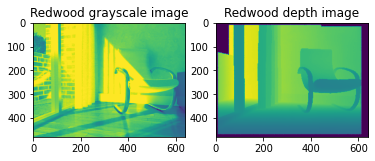

In [31]:
plt.subplot(1, 2, 1)
plt.title('Redwood grayscale image')
plt.imshow(rgbd_image.color)
plt.subplot(1, 2, 2)
plt.title('Redwood depth image')
plt.imshow(rgbd_image.depth)
plt.show()

In [32]:
pcd = o3d.geometry.PointCloud.create_from_rgbd_image(
    rgbd_image,
    o3d.camera.PinholeCameraIntrinsic(
        o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault))
# Flip it, otherwise the pointcloud will be upside down
pcd.transform([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]])
o3d.visualization.draw_geometries([pcd])

# Webots

In [2]:
from controller import Robot
from enum import Enum
import open3d as o3d
import numpy as np
import matplotlib.pyplot as plt

# create the Robot instance.
robot = Robot()

# get the time step of the current world.
timestep = int(robot.getBasicTimeStep())

rangefinder = robot.getDevice('range-finder')
rangefinder.enable(timestep)

camera = robot.getDevice('camera')
camera.enable(timestep)

for i in range(10):
    robot.step(timestep)

In [2]:
depth_1darray = np.frombuffer(rangefinder.getRangeImage(data_type="buffer"), dtype=np.float32)
depth=np.reshape(depth_1darray,(240,320))
depth=depth*1000.0

image_1darray = camera.getImage()
image = np.frombuffer(image_1darray, np.uint8).reshape((camera.getHeight(), camera.getWidth(), 4))


robot.step(timestep)

0

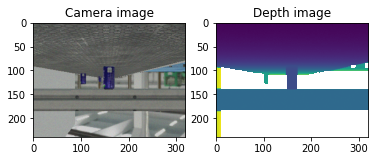

In [3]:
plt.subplot(1, 2, 1)
plt.title('Camera image')
plt.imshow(image)
plt.subplot(1, 2, 2)
plt.title('Depth image')
plt.imshow(depth)
plt.show()

In [12]:
rgbd_image = o3d.geometry.RGBDImage.create_from_color_and_depth(
        o3d.geometry.Image(image), 
        #o3d.geometry.Image(depth),
        o3d.geometry.Image(np.array(depth).astype('uint16')),
        convert_rgb_to_intensity=False,
        depth_scale=1000.0, depth_trunc=3.49)

pcd = o3d.geometry.PointCloud.create_from_rgbd_image(
    rgbd_image,
       o3d.camera.PinholeCameraIntrinsic(320,240,320,240,160,120),
    project_valid_depth_only=True
)
# Flip it, otherwise the pointcloud will be upside down
#pcd.transform([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]])
o3d.visualization.draw_geometries([pcd])

In [6]:
np.asarray(pcd.points)

array([[-0.1728    , -0.1296    ,  0.21600001],
       [-0.177285  , -0.1338    ,  0.223     ],
       [-0.16589999, -0.126     ,  0.20999999],
       ...,
       [-2.58899993,  2.05393994,  3.4519999 ],
       [-2.57844497,  2.05929498,  3.46099997],
       [-2.57520001,  2.07060001,  3.48000002]])

Next steps:

- remove plane
- remove noise
- fit bounding object
- get center of bounding object to move robot arm